(-0.002, 0.004)

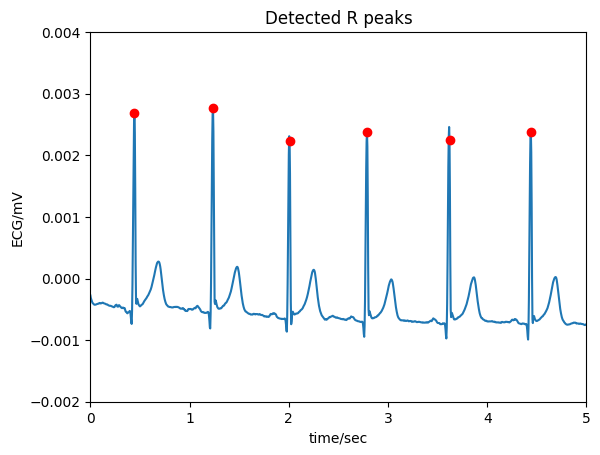

In [43]:
## Example analysis of heart rate metrics from ECG data (adapted from https://github.com/berndporr/py-ecg-detectors/)

import numpy as np
import matplotlib.pyplot as plt
from ecgdetectors import Detectors # Luis Howell & Bernd Porr (https://github.com/berndporr/py-ecg-detectors/blob/master/ecgdetectors.py)

example_dir = "./example_data/ECG.tsv" # https://github.com/berndporr/py-ecg-detectors/blob/master/example_data/ECG.tsv
unfiltered_ecg_dat = np.loadtxt(example_dir) 
unfiltered_ecg = unfiltered_ecg_dat[:, 0]
fs = 250
period = 1.0/fs

detectors = Detectors(fs)
r_samples = detectors.two_average_detector(unfiltered_ecg) # see other algos like matched filters
r_samples = np.array(r_samples)-1 #better fit for the average detector algo
r_ts = np.array(r_samples) / fs

plt.figure()
t = np.linspace(0, len(unfiltered_ecg) / fs, len(unfiltered_ecg))
plt.plot(t, unfiltered_ecg)
plt.plot(r_ts, unfiltered_ecg[r_samples], 'ro')
plt.title("Detected R peaks")
plt.ylabel("ECG/mV")
plt.xlabel("time/sec")
plt.xlim([0,5])
plt.ylim([-0.002,0.004])

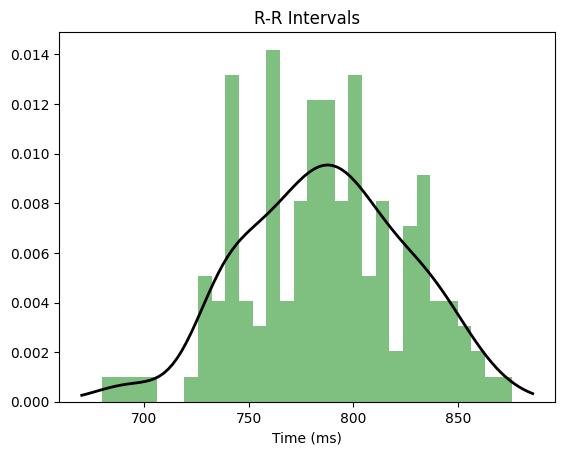

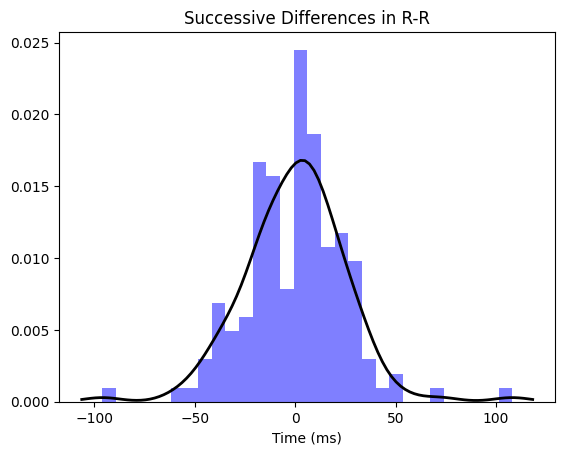

In [44]:
rr_intervals = np.diff(np.array(r_ts)*1000)
succ_diffs = np.diff(rr_intervals)

from scipy.stats import gaussian_kde
def plotDens(x,col='blue',title='',xlab=''):
    plt.hist(x, bins=30, density=True, alpha=0.5, color=col)
    kde = gaussian_kde(x)
    xmin, xmax = plt.xlim()
    x_lin = np.linspace(xmin, xmax, 100)
    p = kde(x_lin)
    plt.plot(x_lin, p, 'k', linewidth=2)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel('')
    plt.show()

plotDens(rr_intervals,'green','R-R Intervals','Time (ms)')
plotDens(succ_diffs,'blue','Successive Differences in R-R','Time (ms)')

In [56]:
HR = 1000*60.0/(rr_intervals)
aHR = np.mean(HR)
sdHR = np.std(HR)
print('Avg HR:'+ str(np.round(aHR,1)) + 'bpm')
print('SD HR:'+ str(np.round(sdHR,1)) + 'bpm')

SDNN = np.std(rr_intervals) #Calculate SDNN, the standard deviation of NN intervals (assuming RR is a good guide)
print('SDNN:'+ str(np.round(SDNN,1)) + 'ms')

RMSSD = np.sqrt(np.mean(np.array(succ_diffs)**2)) #root mean square of successive differences in NN (or RR, rather)
print('RMSSD:'+ str(np.round(RMSSD,1)) + 'ms')

SDSD = np.std(succ_diffs) #standard deviation of the successive differences in NN (or RR, rather)
print('SDSD:'+ str(np.round(SDSD,1)) + 'ms')

NN50 = len(np.where(abs(succ_diffs)>50)[0])
#print('NN50:'+ str(NN50))

pNN50 = NN50/len(succ_diffs) #percentage of cases where successive differences in NN (or RR, rather) is >50ms
print('pNN50:'+ str(pNN50*100) + '%')

NN20 = len(np.where(abs(succ_diffs)>20)[0])
#print('NN20:'+ str(NN20))

pNN20 = NN20/len(succ_diffs) #percentage of cases where successive differences in NN (or RR, rather) is >50ms
print('pNN20:'+ str(pNN20*100) + '%')

Avg HR:76.5bpm
SD HR:3.8bpm
SDNN:38.2ms
RMSSD:25.2ms
SDSD:25.2ms
pNN50:4.0%
pNN20:32.0%
